In [1]:
using QuantumDynamics
using Plots
using LinearAlgebra

Soon will integrate units into QuantumDynamics.jl ridding the necessity of these constants

In [2]:
const thz2au = 0.0001519828500716
const invcm2au = 4.55633e-6
const au2fs = 0.02418884254
const mev2invcm = 8.066
const mev2au = mev2invcm * invcm2au
const nm2au = 18.897

18.897

Parameters for PDI (DOI : 10.1021/jp503398a)

In [3]:
Es = 2.22 * 1000
Ec = 3.11 * 1000
Et =  1.05 * 1000
t2e = -0.42
thh = -125.0
tll = 145.0
thl = -125.0

-125.0

In [4]:
N = 5

5

In [5]:
    H0 = Matrix{ComplexF64}([
        Es 0 tll -thh t2e
        0 Es -thh tll t2e
        tll -thh Ec 0 √(3/2)*thl
        -thh tll 0 Ec √(3/2)*thl
        t2e t2e √(3/2)*thl √(3/2)*thl 2*Et
    ]) * mev2au

5×5 Matrix{ComplexF64}:
    0.081588+0.0im          0.0+0.0im  …  -1.54356e-5+0.0im
         0.0+0.0im     0.081588+0.0im     -1.54356e-5+0.0im
  0.00532895+0.0im   0.00459392+0.0im     -0.00562638+0.0im
  0.00459392+0.0im   0.00532895+0.0im     -0.00562638+0.0im
 -1.54356e-5+0.0im  -1.54356e-5+0.0im       0.0771779+0.0im

In [6]:
show(stdout, "text/plain", real.(H0))

5×5 Matrix{Float64}:
  0.081588     0.0          0.00532895   0.00459392  -1.54356e-5
  0.0          0.081588     0.00459392   0.00532895  -1.54356e-5
  0.00532895   0.00459392   0.114297     0.0         -0.00562638
  0.00459392   0.00532895   0.0          0.114297    -0.00562638
 -1.54356e-5  -1.54356e-5  -0.00562638  -0.00562638   0.0771779

In [6]:
Jw = SpectralDensities.DrudeLorentz(λ=135*mev2au, γ=150*mev2au, Δs=1.0)

QuantumDynamics.SpectralDensities.DrudeLorentz(0.0049614333003000005, 0.005512703667, Float16(1.0), 5.512703667, false)

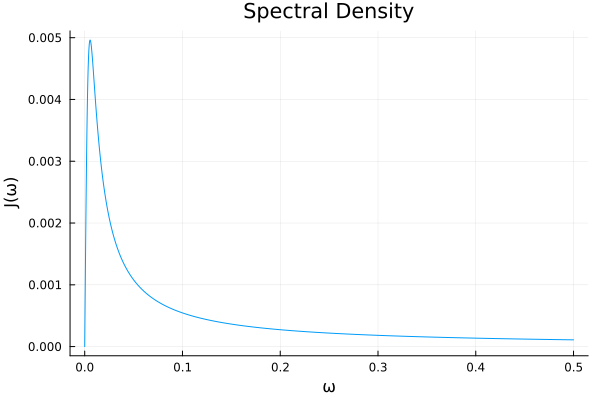

In [10]:
ω = 0:0.0001:0.5
plot(ω, Jw.(ω), xlabel="ω", ylabel="J(ω)", title="Spectral Density", legend=false)

In [11]:
using DelimitedFiles
writedlm("Jw_1.txt", zip(ω, Jw.(ω)))

In [12]:
nsteps = 200
ρ0 = Matrix{ComplexF64}(zeros(N, N))
ρ0[1, 1] = 1.0

T = 50.0:50.0:500.0

β = 1 / (300 * 3.16683e-6) # T = 300K

1052.5772881188234

Simulation is sensitive to dt value for low values of memory lengths

In [13]:
dt = 0.5/au2fs 

20.670687287875495

In [34]:
#ωs, cs = SpectralDensities.discretize(Jw, 100)

In [35]:
# ## QCPI Run

# #hb = Solvents.HarmonicBath(β, ωp, ωpg0p, [1.0, 2.0, 3.0, 4.0, 5.0].*d, 1000)
# hb = Solvents.HarmonicBath(β, ωs, cs, [1.0, 2.0, 3.0, 4.0, 5.0], 1000)
# tc, ρc = QCPI.propagate(; Hamiltonian=H0, Jw=Jw, solvent=hb, ρ0, classical_dt=dt / 100, dt, ntimes=nsteps, kmax=3, svec=[1.0 2.0 3.0 4.0 5.0], extraargs=QuAPI.QuAPIArgs(), path_integral_routine=QuAPI.propagate, verbose=true)

In [36]:
# plot(tc.*au2fs, real.(ρc[:, 1, 1]), label="S1S0")
# plot!(tc.*au2fs, real.(ρc[:, 3, 3]), label="CT")
# plot!(tc.*au2fs, real.(ρc[:, 5, 5]), label="TT")

In [37]:
# fbU = Propagators.calculate_bare_propagators(; Hamiltonian=H0, dt, ntimes=nsteps)
# tquapi, ρquapi = QuAPI.propagate(; 
#                                 fbU=fbU, 
#                                 Jw=[Jw],
#                                 β=β,
#                                 ρ0=ρ0,
#                                 dt,
#                                 ntimes=nsteps,
#                                 svec=[1.0 2.0 3.0 4.0 5.0],
#                                 kmax=3,
#                                 verbose=true)

In [13]:
#fbU = Propagators.calculate_bare_propagators(; Hamiltonian=H0, dt=dt, ntimes=nsteps)
#=@time t_TTM, ρ_TTM = TTM.propagate(; fbU=fbU,
                            Jw=[Jw],
                            β=β,
                            ρ0=ρ0,
                            dt=dt,
                            ntimes=nsteps,
                            rmax=1,
                            svec=[1.0 2.0 3.0 4.0 5.0],
                            extraargs=QuAPI.QuAPIArgs(),
                            path_integral_routine=QuAPI.build_augmented_propagator)=#

In [14]:
plot(t_TTM.*au2fs, real.(ρ_TTM[:, 1, 1]), label="S0S1")
plot!(t_TTM.*au2fs, real.(ρ_TTM[:, 3, 3]), label="CT")
plot!(t_TTM.*au2fs, real.(ρ_TTM[:, 5, 5]), label="TT")

LoadError: InterruptException:

In [47]:
cond(H0)

1.586407042234112

In [48]:
eigvals(H0)

5-element Vector{Float64}:
 0.07469633680127971
 0.07986745677347906
 0.081571505140116
 0.11431323182728402
 0.1184987947306413

In [14]:
fbU = Propagators.calculate_bare_propagators(; Hamiltonian=H0, dt=dt, ntimes=nsteps)
@time t_TTM, ρ_TTM_TEMPO = TTM.propagate(; fbU=fbU,
                            Jw=[Jw],
                            β=β,
                            ρ0=ρ0,
                            dt=dt,
                            ntimes=nsteps,
                            rmax=10,
                            svec=[1.0 2.0 3.0 4.0 5.0],
                            extraargs=TEMPO.TEMPOArgs(),
                            path_integral_routine=TEMPO.build_augmented_propagator)

 66.698296 seconds (56.13 M allocations: 54.208 GiB, 10.23% gc time, 43.24% compilation time: <1% of which was recompilation)


(0.0:20.670687287875495:4134.137457575099, ComplexF64[1.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.9798665984416699 - 1.5150399307739544e-19im -0.009437490954592832 + 0.0036752150551748472im … -0.0774115245891707 - 0.0421883611627561im 0.0024359779650986605 - 0.010575392222639304im; … ; 0.9258528929515686 - 5.060567519088962e-13im 0.09992486834628914 + 0.018786110502058313im … -0.2912534585575792 - 0.5862514097234909im -0.3860165634104102 + 0.03584024991809956im; 0.8242480056244574 - 1.7232654328651477e-13im 0.03617917215256874 - 0.02595651283024128im … -0.5436724272123346 - 0.544856893147854im -0.29394392208804443 - 0.1664282574068853im;;; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; -0.009437490954592846 - 0.0036752150551748555im 0.0001054388857563402 - 3.8624702394796095e-18im … 0.0006001936795384504 + 0.0007119240126003764im -6.497536892426429e-5 + 9.5433514014037e-5im; … ; 0.09992486834563494 - 0.018786110502513775im 0.024354399486874668 - 4.5068100004566333e-13im … 

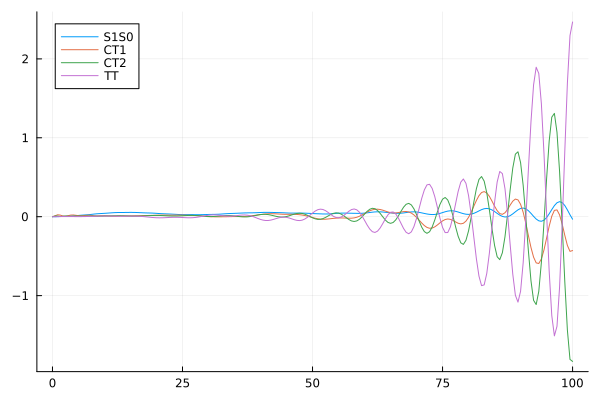

In [15]:
plot(t_TTM.*au2fs, real.(ρ_TTM_TEMPO[:, 1, 1]), label="S0S1")
plot(t_TTM.*au2fs, real.(ρ_TTM_TEMPO[:, 2, 2]), label="S1S0")
plot!(t_TTM.*au2fs, real.(ρ_TTM_TEMPO[:, 3, 3]), label="CT1")
plot!(t_TTM.*au2fs, real.(ρ_TTM_TEMPO[:, 4, 4]), label="CT2")
plot!(t_TTM.*au2fs, real.(ρ_TTM_TEMPO[:, 5, 5]), label="TT")

In [33]:
plot(tquapi.*au2fs, real.(ρquapi[:, 1, 1]), label="S0S1")
plot!(tquapi.*au2fs, real.(ρquapi[:, 3, 3]), label="CT")
plot!(tquapi.*au2fs, real.(ρquapi[:, 5, 5]), label="TT")

In [52]:
fbU = Propagators.calculate_bare_propagators(; Hamiltonian=H0, dt, ntimes=nsteps)
tq, ρq = TEMPO.propagate(; 
                        fbU=fbU,
                        Jw=[Jw],
                        β=β,
                        ρ0=ρ0,
                        dt,
                        ntimes=nsteps,
                        svec=[1.0 2.0 3.0 4.0 5.0],
                        kmax=3)

(0.0:82.68274915150198:4134.137457575099, [1.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.8522623020093625 + 1.1660914396792877e-17im -0.014696754091873362 + 0.10884842335852678im … 0.10714560986382018 + 0.09409465027250112im 0.014624136396005728 + 0.06724826419920582im; … ; 0.0686375992588631 - 8.332217512023718e-16im -0.012723734051083908 + 0.020445936725603953im … -0.0016942544991475884 + 0.012819748789259908im -0.023872408958619296 + 0.014976378467714505im; 0.06897264587530347 - 7.820317347805659e-16im -0.012971749915100562 + 0.02036829492672607im … -0.001536180534884489 + 0.012889262908657287im -0.02381658697489498 + 0.014942494828207585im;;; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; -0.014696754091873404 - 0.10884842335852682im 0.015250392135835553 - 2.0816681711721685e-17im … 0.012717605441600666 - 0.019141665034557595im 0.01123162922710759 - 0.004078744591153781im; … ; -0.012723734051083534 - 0.02044593672560234im 0.2457590606268556 - 2.8705336718726215e-15im … -

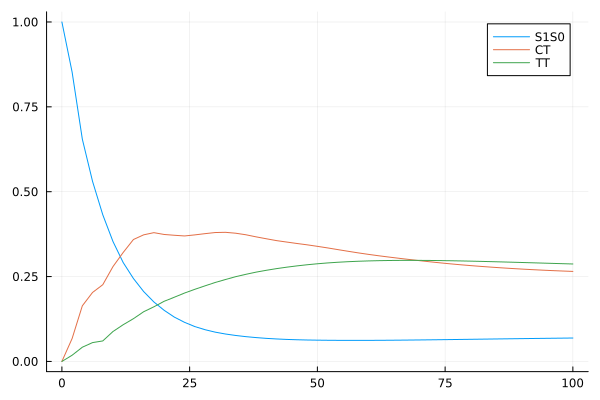

In [54]:
plot(tq.*au2fs, real.(ρq[:, 1, 1]), label="S1S0")
plot!(tq.*au2fs, real.(ρq[:, 3, 3]), label="CT")
plot!(tq.*au2fs, real.(ρq[:, 5, 5]), label="TT")

In [55]:
# HEOM calculation here (relies on defining a set of spectral densities (not sure why)

λs = repeat([135.0], 5) * mev2au
γs = repeat([150.0], 5) * mev2au
JwH = Vector{SpectralDensities.DrudeLorentz}()
sys_ops = Vector{Matrix{ComplexF64}}()
for (j, (λ, γ)) in enumerate(zip(λs, γs))
    push!(JwH, SpectralDensities.DrudeLorentz(; λ, γ, Δs=1.0))
    op = zeros(5, 5)
    op[j, j] = 1.0
    push!(sys_ops, op)
end


times_HEOM, ρs_HEOM = HEOM.propagate(;
                                    Hamiltonian=H0,
                                    ρ0,
                                    β,
                                    dt,
                                    ntimes=nsteps,
                                    Jw=JwH,
                                    sys_ops=sys_ops,
                                    num_modes=1,
                                    Lmax=2)

([0.0, 82.68274915150198, 165.36549830300396, 248.04824745450594, 330.7309966060079, 413.4137457575099, 496.0964949090119, 578.7792440605139, 661.4619932120158, 744.1447423635178  …  3389.992715211581, 3472.675464363083, 3555.358213514585, 3638.040962666087, 3720.723711817589, 3803.406460969091, 3886.089210120593, 3968.771959272095, 4051.454708423597, 4134.137457575099], [1.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.8595712059923205 + 0.0im -0.043805531451804006 + 0.06385449310555441im … -0.14744564967154658 - 0.0437507776866775im 0.057019204022412645 - 0.0637981199914546im; … ; 0.02241336745136534 + 0.0im 0.00734281130528777 + 0.0001860681113357644im … -0.005410944574928727 - 0.0007445634013538927im -0.07991392376818109 - 0.015577279550011047im; 0.022001278636408193 + 0.0im 0.007196901943738495 + 0.0001617831603189734im … -0.005344708492111111 - 0.0007112411270266973im -0.07993823732223983 - 0.015414098460348002im;;; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; -0.043805

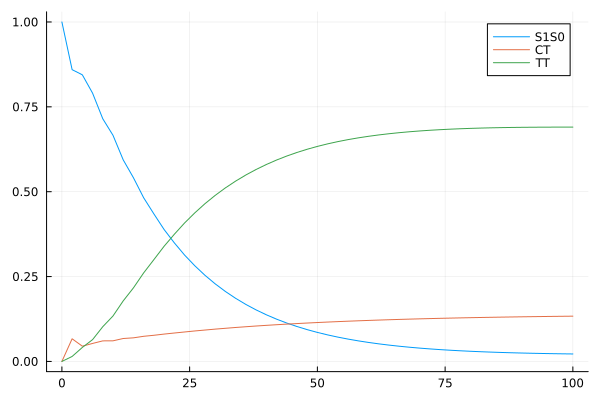

In [56]:
plot(times_HEOM.*au2fs, real.(ρs_HEOM[:, 1, 1]), label="S1S0")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 3, 3]), label="CT")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 5, 5]), label="TT")

In [57]:
times_BRME, ρs_BRME = BlochRedfield.propagate(;
                                            Hamiltonian=H0,
                                            Jw=JwH,
                                            β,
                                            ρ0,
                                            dt,
                                            ntimes=nsteps,
                                            sys_ops)

([0.0, 82.68274915150198, 165.36549830300396, 248.04824745450594, 330.7309966060079, 413.4137457575099, 496.0964949090119, 578.7792440605139, 661.4619932120158, 744.1447423635178  …  3389.992715211581, 3472.675464363083, 3555.358213514585, 3638.040962666087, 3720.723711817589, 3803.406460969091, 3886.089210120593, 3968.771959272095, 4051.454708423597, 4134.137457575099], [0.9999999999999999 + 0.0im 7.696879793380991e-17 + 0.0im … 6.400789076009043e-18 + 0.0im 5.119881551839185e-17 + 0.0im; 0.7590093734698372 + 4.204183196769317e-17im -0.08623091913647275 + 0.07620311825169214im … -0.1765141929825219 - 0.02550710033935816im 0.034085340319131456 - 0.0789329778136525im; … ; 0.1185452915590622 + 1.2038923526248606e-17im -0.0016873145419265473 + 0.008571037945396905im … -0.03434253353675075 + 0.0009489696999269862im -0.15005801969566265 + 0.00905219653814852im; 0.1202904609930725 + 5.2586279172460886e-17im 0.00032602914407205635 - 0.010053611495640328im … -0.03633038716061648 + 0.0053128245

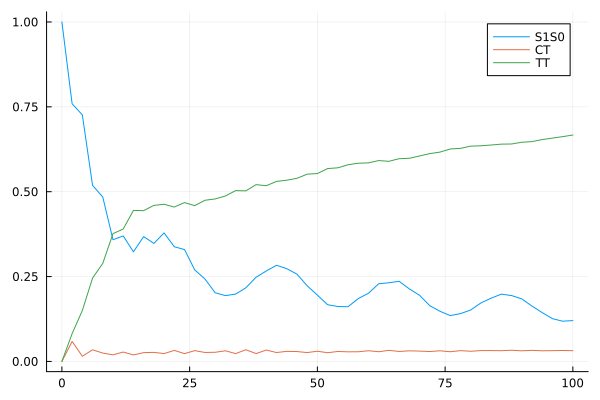

In [58]:
plot(times_BRME.*au2fs, real.(ρs_BRME[:, 1, 1]), label="S1S0")
plot!(times_BRME.*au2fs, real.(ρs_BRME[:, 3, 3]), label="CT")
plot!(times_BRME.*au2fs, real.(ρs_BRME[:, 5, 5]), label="TT")